In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

## TEIS BDI-3 Analysis

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a voluntary program that offers therapy and other services to families of infants and young children with developmental delays or disabilities. Services are provided at no cost to families. TEIS is critically important to supporting the development of Tennessee children with disabilities and developmental delays as they prepare for school.

In this project, you are going to be working with data gathered from the Battelle Developmental Inventory, Third Edition (BDI-3) Eligibility Evaluation, an early childhood instrument based on the concept of developmental milestones. The BDI-3 is used by TEIS for determining eligibility and outcomes. This assessment tool has been in use for less than a year now, so the purpose of your work is to analyze the scores to see if there appear to be any weaknesses in this tool in any of the assessed domains or subdomains.

The BDI-3 is divided into 5 domains, each of which has 2 or 3 subdomains. On each domain and subdomain, a child receives several different scores. An example score report is available in the BDI3_ScoreReport.pdf file. See page 3 of this file for a detailed description of each score. Note that the BDI-3 is norm-based, meaning that the scores are generated by the child's performance based on the performance of same-aged peers on the same items. 

Some notes about the data:
* The same instrument is used for determining eligibility and outcomes. The type of evaluation can be determined from the "Program Label" column, which will indicate either an eligibility evaluation, an annual evaluation, or a birthday/milestone or exit evaluation. 
* Some of the rows are duplicated, so be sure to check that in your initial data inspection and cleaning. In addition, some children will have multiple rows in the dataset. A child is evaluated at initial eligibility, annually, and at their 3rd birthday or exit under certain circumstances. The evaluation may be repeated every 4 months (e.g. a child was ineligible and re-referred). 
* There are many records that are missing ID numbers. These records have been given a unique identifier which starts with "SP" so that they can be identified.
* When reading the data in, you may notice that some of the values in the RDI columns are incorrectly converted to dates. It is likely that this happens whenever the numerator of the fraction is 12 or less.

#### Exploratory Data Analysis

Reading in the Excel file.

In [2]:
dataset = pd.read_excel(r"C:\Users\mgood\Documents\nss_data_analytics\projects\teis-concat-dog\data\all_evals.xlsx")

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23947 entries, 0 to 23946
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


Dropping duplicates. See below, we go from 23947 entries in `dataset` 19500 entries in `teis_df`.

In [10]:
teis_df = dataset.drop_duplicates()

In [12]:
teis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19500 entries, 0 to 23946
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 32.7+ MB


<Axes: xlabel='Cognitive Developmental Quotient', ylabel='Count'>

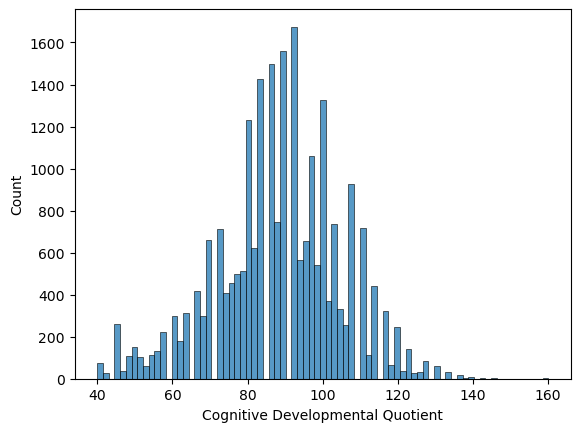

In [22]:
sns.histplot(dataset,
                 x = dataset['Cognitive Developmental Quotient'])

<Axes: xlabel='Communication Developmental Quotient', ylabel='Count'>

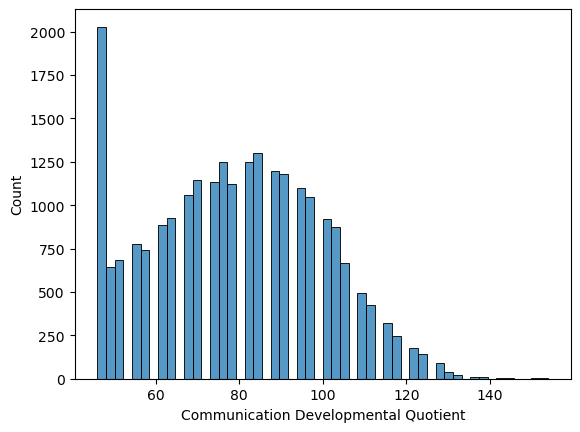

In [24]:
sns.histplot(dataset,
                 x = dataset['Communication Developmental Quotient'])

<Axes: xlabel='Social-Emotional Developmental Quotient', ylabel='Count'>

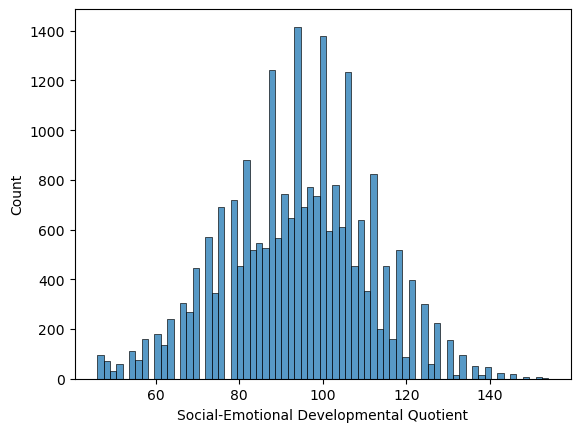

In [25]:
sns.histplot(dataset,
                 x = dataset['Social-Emotional Developmental Quotient'])

<Axes: xlabel='BDI-3 Total Developmental Quotient', ylabel='Count'>

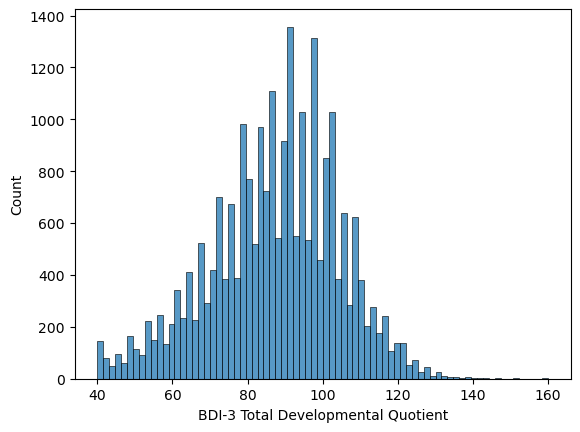

In [23]:
sns.histplot(dataset,
                 x = dataset['BDI-3 Total Developmental Quotient'])

In [30]:
teis_df.tail()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23946,SP03291,M,2023-09-18,Greater Nashville,BDI-3 Eligibility Evaluation,11.0,105.0,63,94-114,94/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
teis_df.groupby(teis_df['Program Label']).size()

Program Label
BDI-3 Annual Evaluation                6905
BDI-3 Eligibility Evaluation          12392
BDI-3 Milestone or Exit Evaluation      203
dtype: int64

In [37]:
teis_df.groupby(teis_df['Gender']).size()

Gender
F     7246
M    11960
U      294
dtype: int64

In [38]:
teis_df.groupby(teis_df['Location - Sub Level 1']).size()

Location - Sub Level 1
East Tennessee         3340
First Tennessee        1701
Greater Nashville      3436
Memphis Delta          2717
Northwest               955
South Central          2560
Southeast Tennessee    1583
Southwest              1100
Upper Cumberland       2021
dtype: int64

In [39]:
percent_blank = teis_df.isnull().sum() * 100 / len(teis_df)
# percent_blank_df = pd.DataFrame({'column_name': df.columns,
#                                  'percent_missing': percent_missing})

In [41]:
print(percent_blank)

Child ID                    0.000000
Gender                      0.000000
Date of Birth               0.000000
Location - Sub Level 1      0.446154
Program Label               0.000000
                             ...    
Code 6                    100.000000
Code 7                    100.000000
Code 8                    100.000000
Code 9                    100.000000
Code 10                   100.000000
Length: 219, dtype: float64


Project Objectives:
1. In which domains (and sub-domains) are children performing highest and lowest?

* Make an age column
* Percentile rank might be a good measure since it's for their age group. 

2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

<Axes: xlabel='Adaptive Developmental Quotient', ylabel='Count'>

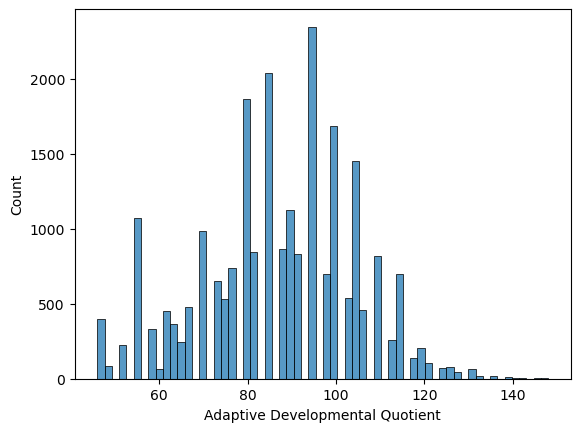

In [26]:
sns.histplot(dataset,
                 x = dataset['Adaptive Developmental Quotient'])

<Axes: xlabel='Motor Developmental Quotient', ylabel='Count'>

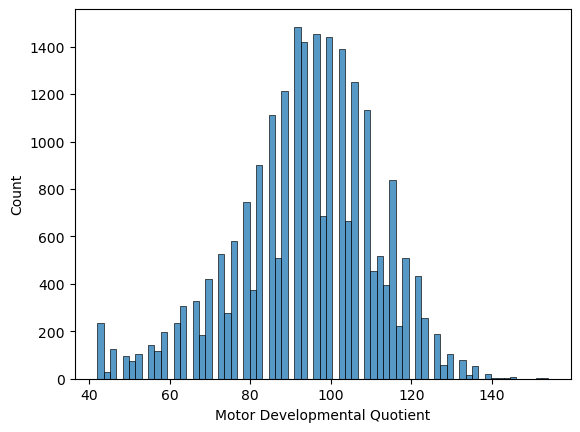

In [21]:
sns.histplot(dataset,
                 x = dataset['Motor Developmental Quotient'])

3. Is there a pattern of significant differences in children's scores in the sub-domains within a domain? For example, a gap between a child's expressive (talking) and receptive (understanding) language scores may indicate that additional evaluation is needed for that child's eligibility. A gap between these sub-domains for all or most children may indicate the BDI-3 tool may lack sensitivity in the language domain.

4. Does the child's age seem to impact their scoring?

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

6. Is there any difference in scoring noted based on evaluation type?

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

8. Is there any notable pattern of scoring by evaluator?

Stretch Goal:
* Investigate the records that are missing ID values. Have they gotten better or worse over time? Are there repeat offenders?
* As noted above, this evaluation may be repeated every 4 months. How often did it occur that a child was assessed multiple times in a time period of less than 120 days. Has this gotten better or worse over time?


(question: does "better or worse" mean that more repeat testing is better?)